# Calculating the Radius from transit depth

You Belong With Me
****

Importing Modules

In [1]:
import astropy.constants as const
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from WhatisLife import Rotator

In [130]:
%matplotlib notebook
π = np.pi
Colour = plt.style.use('tableau-colorblind10')

In [3]:
def ScreamExtractor(File):
    FILENAME = pd.read_csv(f'{File}.csv', sep=',', comment='#')
    return FILENAME

In [57]:
Directory = 'C:/Users/georg/Documents/GitHub/Iwan-and-George-Year-4-Project/Exoplanets/Sorted Data'
PlanetFile = 'Planets/HoVan All Planets'
StarFile = 'Stars/Gaia All Stars'
PlanetData = ScreamExtractor(f'{Directory}/{PlanetFile}')
StarData = ScreamExtractor(f'{Directory}/{StarFile}')

In [58]:
Object = StarData
for f in range(len(Object)):
    if str(Object['Radius'][f]) == 'nan':
        StarData = StarData.drop(f)
Object = PlanetData
for f in range(len(Object)):
    if str(Object['Host Gaia DR3 ID'][f]) == 'nan':
        PlanetData = PlanetData.drop(f)

In [93]:
SourceID = StarData['Gaia DR3 ID'].astype(float)
StellarRadius = StarData['Radius'] #Solar Radius
PlanetID = PlanetData['Host Gaia DR3 ID']
OrbitalPeriod = PlanetData['P'] #Days
Ratio = PlanetData['PSR'] #%

In [96]:
OrbitalPeriodList = []
PlanetRadius = []
for n in range(len(PlanetID)):
    try:
        Index = StarData.loc[StarData['Gaia DR3 ID'] == PlanetID[n]].index[0]
        OrbitalPeriodList.append(OrbitalPeriod[n])
        Radius = Ratio[n]*StellarRadius[Index]*const.R_sun/const.R_earth
        PlanetRadius.append(Radius)
    except:
        continue

In [99]:
def Identifying_Delta_nu(Data):
    Deltanu = 3    # Starting value for iteration.
    x, y, deltat = fft(BinsOld(Deltanu, *Data))    # Performing the Fourier Transform on the binned data.
    X = list(x.copy())
    Y = list(y.copy())
    while True:
        Index = np.argmax(Y[:len(Y)//2])
        if Index < 10:
            X.remove(X[Index])
            Y.remove(Y[Index])
        else:
            break
    Δν = 2/X[Index]
    
    plt.figure()
    plt.plot(x, y)
    plt.title('Fourier\'s X-Wings')
    plt.xlabel('Frequency of Frequency')
    plt.ylabel('Fractional amplitude')
    plt.show()
    
    return Δν

In [152]:
# Connor Adam code.
def fft(Data):
    data = Data[1]    # Power
    Frequency = Data[0]
    Mean = np.mean(data)
    N = len(Frequency)
    SortedFrequency = np.sort(Frequency)
    Delta_t = SortedFrequency[1] - SortedFrequency[0]
    data_ft = np.abs(np.fft.fft(data-Mean))**2
    freq = np.abs(np.fft.fftfreq(N, Delta_t))    # freq being the frequency of the frequency (time).
    
    return freq, data_ft, Delta_t

In [145]:
OP = np.log10(np.array(OrbitalPeriodList))
PR = np.log10(np.array(PlanetRadius))
Centre = np.array([(min(OP) + max(OP))/2, (min(PR) + max(PR))/2])
Gradient = -0.11
Angle = π/2-np.arctan(np.abs(Gradient))

NewX, NewY = Rotator(OP, PR, Centre, Angle)

<IPython.core.display.Javascript object>


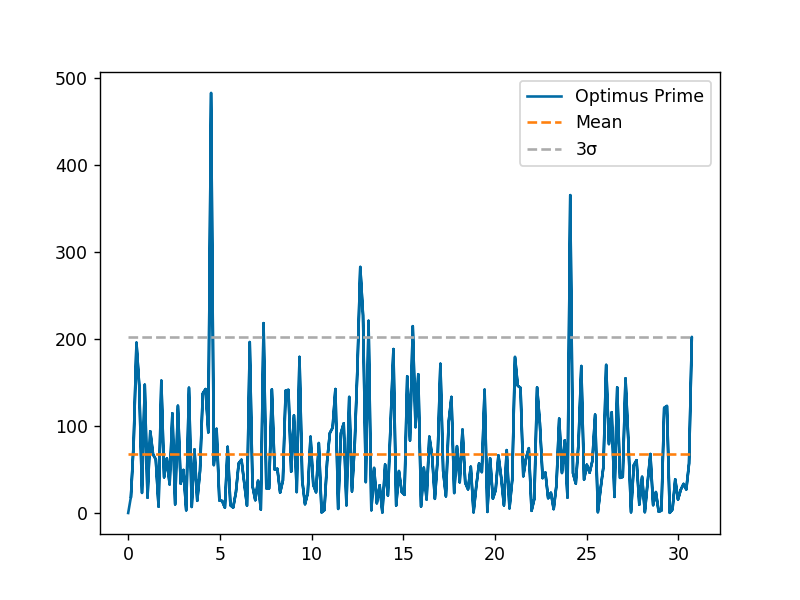

In [153]:
fx, fy, dt = fft([NewX, NewY])
Mean = np.mean(fy[len(fy)//2:])
STD = np.std(fy[len(fy)//2:])

plt.figure()
plt.plot(fx, fy, color=Colour, label='Optimus Prime')
plt.plot([min(fx), max(fx)], [Mean, Mean], '--', color=Colour, label='Mean')
plt.plot([min(fx), max(fx)], [3*STD, 3*STD], '--', color=Colour, label='3σ')
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


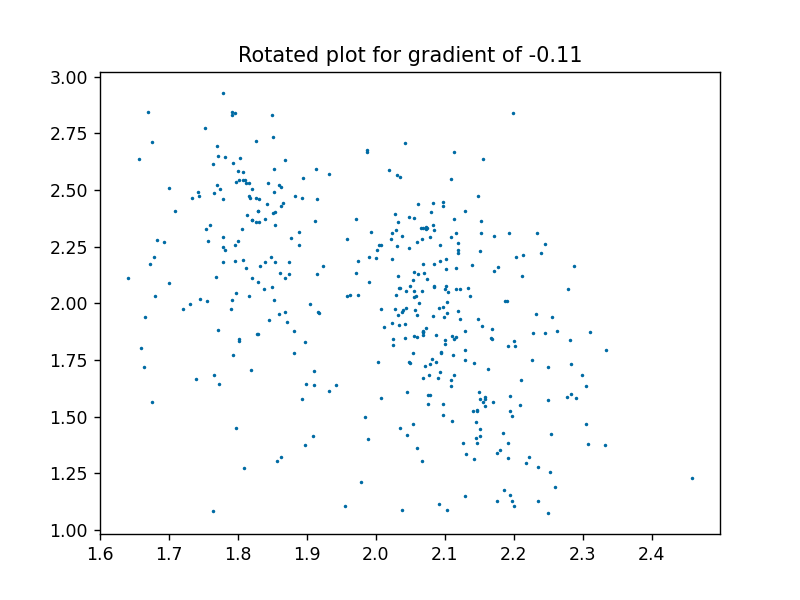

In [143]:
x = np.linspace(1, 3, 2)
y = -0.11*x + 2.15

plt.figure()
plt.plot(NewX, NewY, '.', markersize=2)
#plt.plot(x, y)
plt.title(f'Rotated plot for gradient of {Gradient}')
plt.show()

<IPython.core.display.Javascript object>


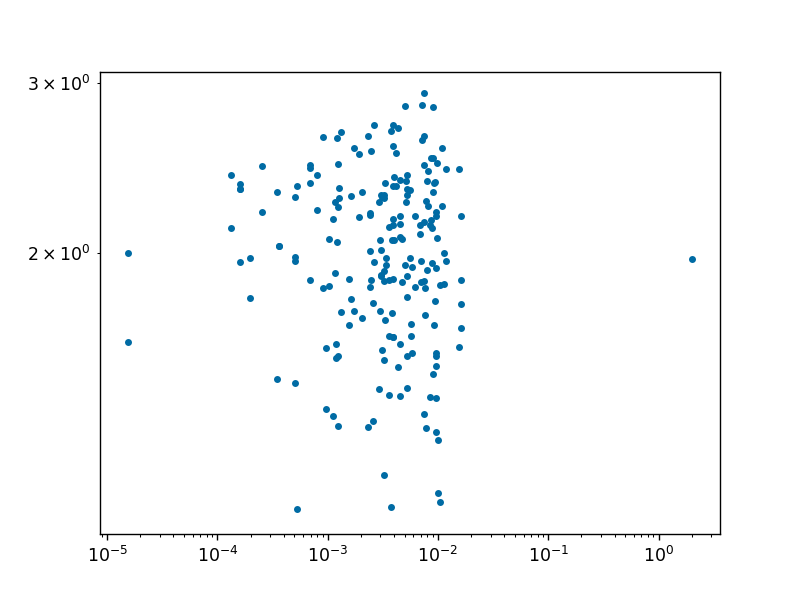

C:\Users\georg\anaconda3\envs\Observatory Laboratory\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [154]:
OldX = np.fft.ifft(NewX)
plt.figure()
plt.plot(OldX, NewY, '.')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [102]:
x = np.linspace(min(OrbitalPeriodList), max(OrbitalPeriodList), 2)
m = -0.11
c = 0.37
y1 = 10**(m*np.log10(x) + c)

<IPython.core.display.Javascript object>


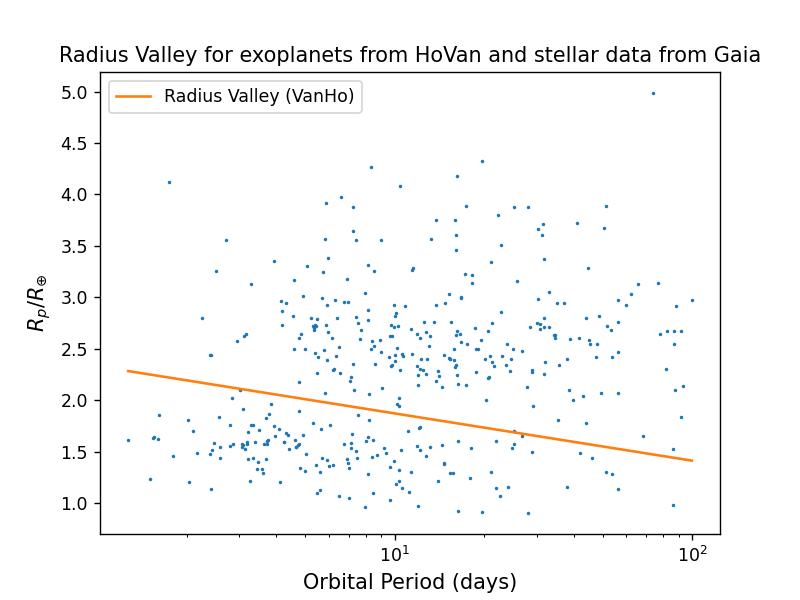

In [103]:
plt.figure()
plt.plot(OrbitalPeriodList, PlanetRadius, '.', markersize=2)
plt.plot(x, y1, label='Radius Valley (VanHo)')
#plt.plot(x, y2, label='Radius Valley (Mine)')
plt.xlabel('Orbital Period (days)', fontsize=12)
plt.ylabel(r'$R_p/R_{\oplus}$', fontsize=12)
plt.title('Radius Valley for exoplanets from HoVan and stellar data from Gaia', fontsize=12)
plt.xscale('log')
plt.legend()
plt.show()

You tatty git